In [6]:
import mlcroissant as mlc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/naveenbhadouria/malicious/croissant/download')

# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
df = record_set_df

# rename columns
df = df.rename(columns={'malicious_phish1.csv/url' : 'url', 'malicious_phish1.csv/type' : 'type'})


  -  [Metadata(Malicious_URL's_Dataset)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="malicious_phish1.csv")]


In [2]:
# Use errors='replace' to substitute bad bytes with a placeholder
df['url'] = df['url'].apply(lambda x: x.decode('utf-8', errors='replace') if isinstance(x, bytes) else x)
df['type'] = df['type'].apply(lambda x: x.decode('utf-8', errors='replace') if isinstance(x, bytes) else x)
df.head()

url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement

In [4]:
df['malicious'] = (df['type'] != 'benign').astype(int)
df.head()

url        type  malicious
0                                   br-icloud.com.br    phishing          1
1                mp3raid.com/music/krizz_kaliko.html      benign          0
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0
3  http://www.garage-pirenne.be/index.php?option=...  defacement          1
4  http://adventure-nicaragua.net/index.php?optio...  defacement          1

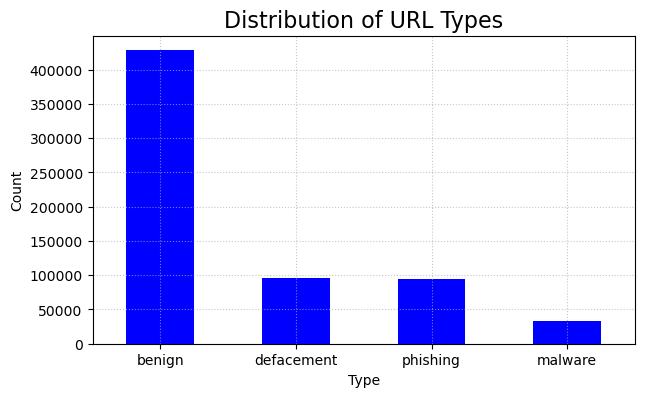

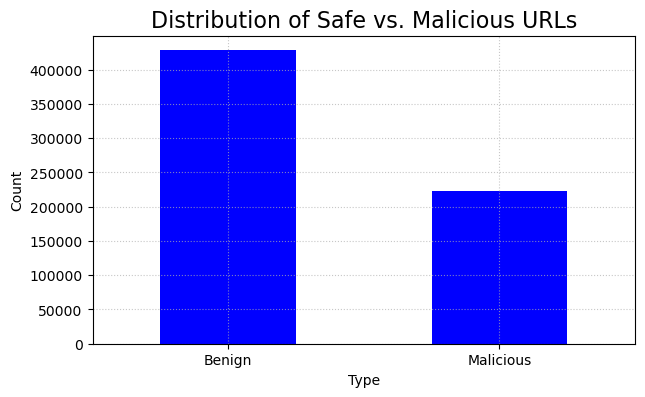

In [19]:
df['type'].value_counts().plot(kind='bar', figsize=(7, 4), color='blue')

# Add title and labels
plt.title('Distribution of URL Types', fontsize=16)
plt.xlabel('Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=0) # Keeps the x-axis labels horizontal
plt.show()

label_map = {0: 'Benign', 1: 'Malicious'}

df['malicious'].map(label_map).value_counts().plot(
    kind='bar', 
    figsize=(7, 4), 
    color='blue'
)

plt.title('Distribution of Safe vs. Malicious URLs', fontsize=16)
plt.xlabel('Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.7)
plt.xticks(rotation=0)
plt.show()
